# __SQL Chinook Analysis__

The first step of our project is to make sure we can use SQL within Jupyter Notebook,  to do this we first need to install [ipython-sql]( https://github.com/catherinedevlin/ipython-sql). If you have the Anaconda installed you can do so by simply running [this code]( https://anaconda.org/conda-forge/ipython-sql). This code is commented out so it doesn’t need to run every time. 

In [1]:
!conda install -yc conda-forge ipython-sql

Solving environment: ...working... done

# All requested packages already installed.



Now that our ipython-sql is all up to date we can connect our Jupyter Notebook to our Chinook database we use `%%capture`, `%load_ext sql` and `sqlite:///`

In [2]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

## __Inspecting Tables__

To run our SQL queries, we need to add `%%sql` at the start of each query. To check that our database is properly connected to our Jupyter Notebook we will create a SELECT query from __sqlite_master__ to list all tables. 

In [3]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


company. We can see tables containing data for employees, customers, invoice, track, artist and playlist. 

Like all relational databases our tables contains [__Primary__ and __Foreign__](https://www.sqlite.org/foreignkeys.html) keys that link all of our tables together. We can see our primary key columns and how our foreign keys interact in the diagram bellow. 

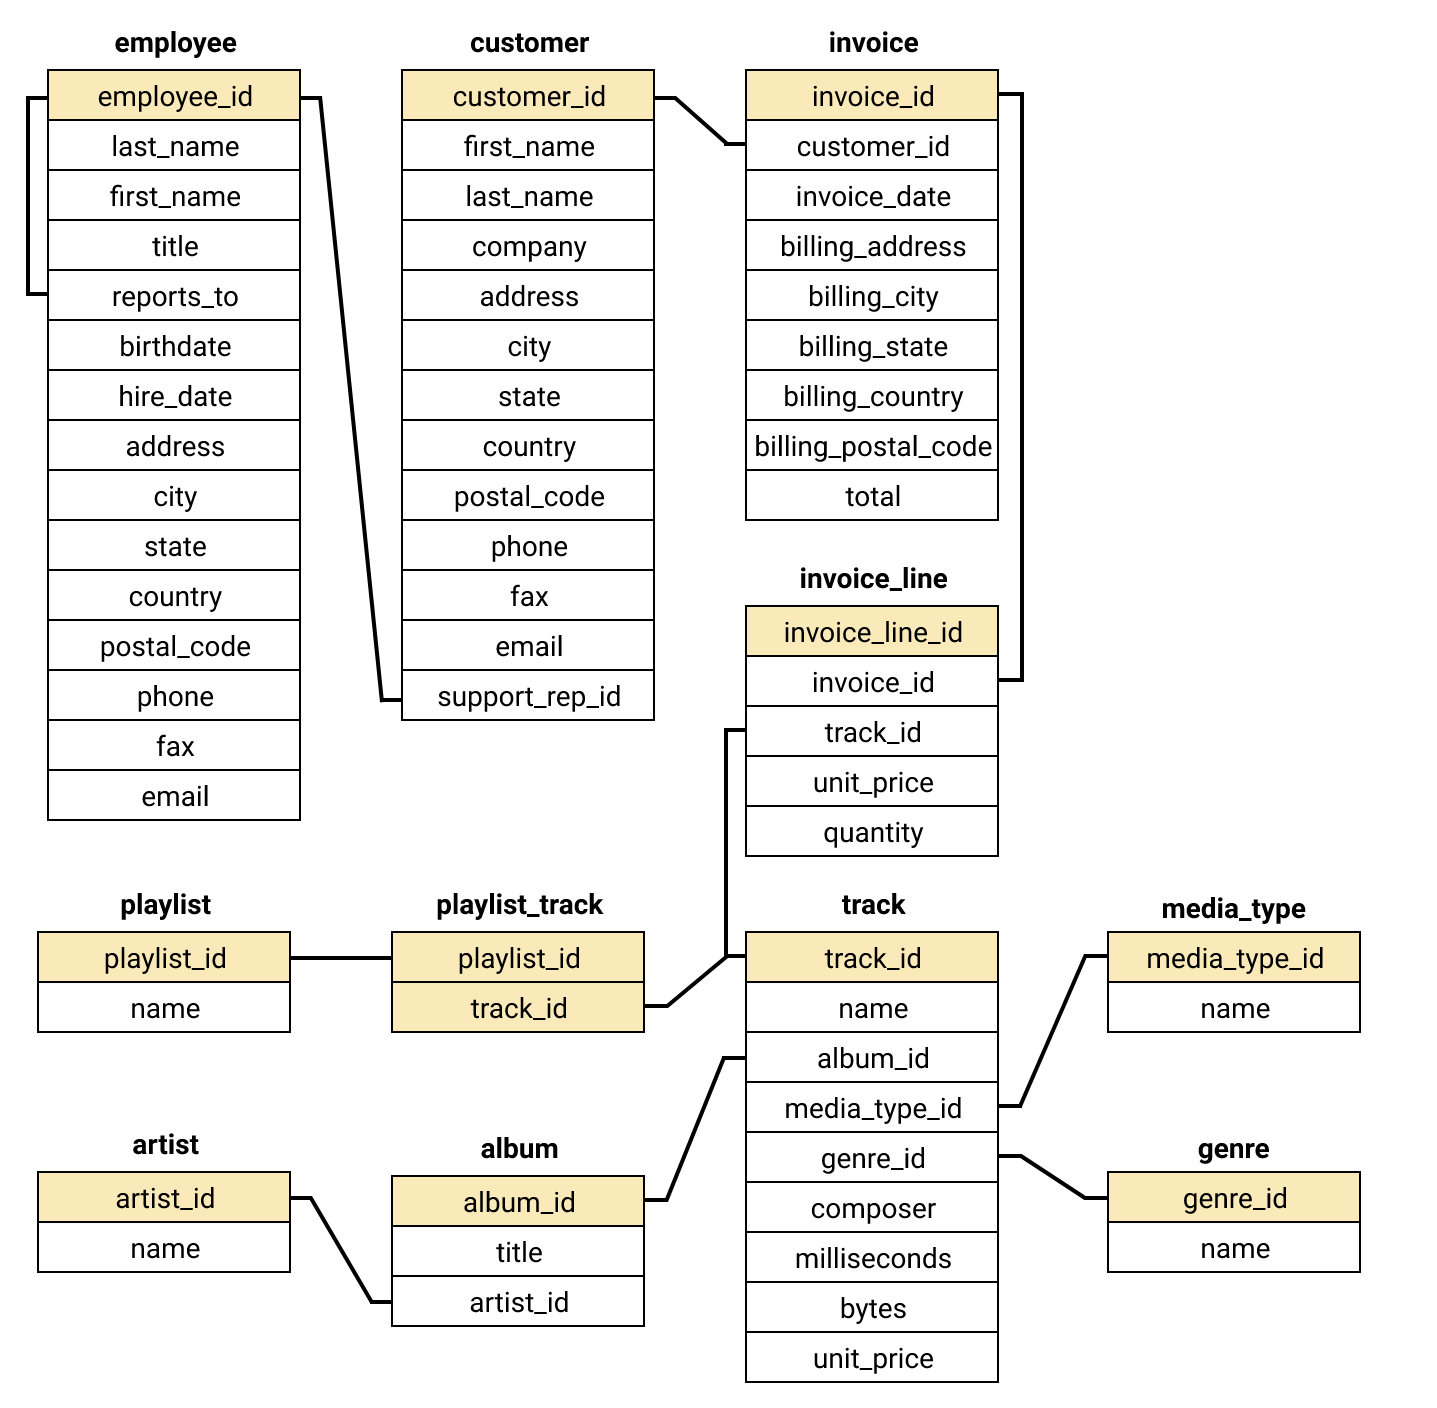

Our diagram shows us our data structure and how our foreign keys interact with the tables. Some interesting things that we can see in our tables:

- The __employee__ table uses its own primary keys as a foreign key to show which employee answers to who. 


- Invoices are broken down into two tables, `
    - __invoice__
    - __invoice_line__
    
    
- The __track__ table has 3 foreign keys in it and is connected to 5 other tables. 


- The are 5 tables with only 2 columns 
    - __playlist__
    - __playlist_track__
    - __artist__
    - __media_type__
    - __genre__

## __Inspecting our Tables__

We can now create some SELECT queries to inspect some of our bigger tables and get more used to them. 

### __Employee Table__

In [4]:
%%sql 
SELECT * 
FROM employee 
LIMIT 5

 * sqlite:///chinook.db
Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


As we can see our __employee__ table contains all the information for our employees. We also see that the `reports_to` refers back to the `employee_id`. 

### __Customer Table__

In [5]:
%%sql 
SELECT *
FROM customer
LIMIT 5

 * sqlite:///chinook.db
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


We can see that the __customers__ table contains customers name, address and contact info. We also see that the `support_rep_id` relates back to the `employee_id` in the employee table which will be useful when we join tables.

### __Invoice Table__

In [6]:
%%sql 
SELECT * 
FROM invoice
LIMIT 5

 * sqlite:///chinook.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.9
3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83


The __invoice__ table connects to the customers table on the `customer_id` column, we can see that the `total` column contains the total dollar value for each invoice which will be an important column for analysis.  

### __Invoice_line Table__

In [7]:
%%sql 
SELECT * 
FROM invoice_line
LIMIT 5

 * sqlite:///chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity
1,1,1158,0.99,1
2,1,1159,0.99,1
3,1,1160,0.99,1
4,1,1161,0.99,1
5,1,1162,0.99,1


We can see that he __invoice_line__ table lists all items purchased from Chinook and organising them by what invoice they belong to in the `invoice_id`. This table will be useful in the future for analysing total sales.   

### __Track Table__

In [8]:
%%sql 
SELECT * 
FROM track
LIMIT 5

 * sqlite:///chinook.db
Done.


track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99
4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",252051,4331779,0.99
5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


The __track__ table contains the information of tracks that have been sold. We also see the 3 foreign keys that we saw in the schema diagram; `album_id`, `media_type`, `genre_id`. With so many other tables connected to the __track__ table, we will need include track in many of our Joins for our analysis.

# __Database Analysis__

## __Most Popular Genres in USA__

Chinook has a client that specialises in artists from the USA. They have asked us to return a list of the top ten most sold music genres sold in the USA and the total sales percentages for each genre. To do this we will start by inspecting the __genre__ table to see how best to join our tables together.

In [9]:
%%sql 

SELECT *
FROM genre
LIMIT 10

 * sqlite:///chinook.db
Done.


genre_id,name
1,Rock
2,Jazz
3,Metal
4,Alternative & Punk
5,Rock And Roll
6,Blues
7,Latin
8,Reggae
9,Pop
10,Soundtrack


We can see that the genre tabe constits of 2 columns:

- The `genre_id` which gives each genre type a unique value to identify it
- The `name` which says shows the name of each genre associated in the `genre_id`

To figure out which genres sold he most in the USA we can start with a subquery called `usa_track_sold` which join the __invoice_line__, __invoice__ and __customer__ tables together. In this subquery we SELECT all columns from the __invoice_line__ table and filter the data on the `country` column in the __customer__ table to only include lines WHERE the country is equal to __USA__.

Once we have our __usa_track_sold__ table we can JOIN it to the __track__ table and the __genre__ table. Once we have all of our tables together, we can select the genre name, the COUNT for the number of rows in __usa_track_sold__ and the genre COUNT divide by the total COUNT. We finish this query by grouping by genre name and ordering by track sold. 

In [10]:
%%sql
WITH usa_track_sold AS
    (
    SELECT il.*
    FROM invoice_line AS il
    INNER JOIN invoice AS i ON i.invoice_id = il.invoice_id
    INNER JOIN customer AS c ON c.customer_id = i.customer_id
    WHERE c.country = 'USA'
    )

SELECT 
    g.name AS genre,
    COUNT(uts.invoice_line_id) AS tracks_sold,
    ROUND(CAST(COUNT(uts.invoice_line_id) AS Float) / (SELECT COUNT(*)
                                                       FROM usa_track_sold), 2) * 100 AS precentage_sold
FROM usa_track_sold AS uts 
INNER JOIN track AS t ON  t.track_id = uts.track_id 
INNER JOIN genre AS g ON g.genre_id = t.genre_id 
GROUP BY g.name
ORDER BY tracks_sold DESC
LIMIT 10;

 * sqlite:///chinook.db
Done.


genre,tracks_sold,precentage_sold
Rock,561,53.0
Alternative & Punk,130,12.0
Metal,124,12.0
R&B/Soul,53,5.0
Blues,36,3.0
Alternative,35,3.0
Pop,22,2.0
Latin,22,2.0
Hip Hop/Rap,20,2.0
Jazz,14,1.0


We can see that within the top 10 most sold genres Rock music out sold all other genres and made up more than 50% of all sales. We see that Rock sold more than 4 times both Alternetive & Punk/ Metal which both accounted for 12% of sales. Other genres all made up 5% or less in total sales.  

## __Finding Most Successful Support Rep__

When Chinook gets a new client, they assign an employee as a sales support agent. These employees can be found in the __customer__ table under the `support_rep_id` column which relates back to the `employee_id` in the __employee__ table.

To find the sales support rep with the most sales we will again make a subquery and this time we JOIN __customer__ and __invoice__ and use the SELECT operator to return `support_rep_id` and the SUM of the of the `total` column. We will call this new table __rep_total__.

We then can join __rep_total__ to the __employee__ table to return all of the desired info for our sales rep employee. We will also concatenate the __employee__ `first_name` and `Last_name` columns to make reading the output easier. 

In [11]:
%%sql
WITH rep_total AS
(
SELECT 
c.support_rep_id AS rep,
SUM(i.total) AS total_sold
FROM customer AS c
INNER JOIN invoice AS i ON c.customer_id = i.customer_id
GROUP BY rep
)

SELECT 
e.first_name ||' '|| e.last_name AS employee_name,
e.phone,
e.email,
ROUND(SUM(rt.total_sold), 2) AS total_sales
FROM rep_total AS rt
INNER JOIN employee AS e on rt.rep = e.employee_id
GROUP BY employee_name


 * sqlite:///chinook.db
Done.


employee_name,phone,email,total_sales
Jane Peacock,+1 (403) 262-3443,jane@chinookcorp.com,1731.51
Margaret Park,+1 (403) 263-4423,margaret@chinookcorp.com,1584.0
Steve Johnson,1 (780) 836-9987,steve@chinookcorp.com,1393.92


We can see that there is no employee that has an outlying number of sales. Jane is the highest performing sales rep which is only 20% more than Steve in last place.

## __Comparing Customers from Different Countries__

The next step of our analysis is to compare customers from different countries to find areas to expand. We will be calculating the total sales for each country, the average order value and the customers lifetime value. As Chinook has customers from all over the world, we want filter our countries with only 1 customer into a different ‘Other’ category which we can do with CASE expression. Once we have labelled out countries we can group them and create a new subquery to sort out values. 

In [29]:
%%sql

WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_lifetime_value
FROM
    (
    SELECT
        country,
        count(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) customer_lifetime_value,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );


 * sqlite:///chinook.db
Done.


country,customers,total_sales,average_order,customer_lifetime_value
USA,13,1040.490000000008,7.942671755725252,80.03769230769292
Canada,8,535.5900000000034,7.047236842105309,66.94875000000043
Brazil,5,427.68000000000245,7.011147540983647,85.53600000000048
France,5,389.0700000000021,7.781400000000042,77.81400000000042
Germany,4,334.6200000000016,8.161463414634186,83.6550000000004
Czech Republic,2,273.24000000000103,9.108000000000034,136.62000000000052
United Kingdom,3,245.52000000000078,8.768571428571457,81.84000000000026
Portugal,2,185.13000000000022,6.3837931034482835,92.56500000000011
India,2,183.1500000000002,8.72142857142858,91.5750000000001
Other,15,1094.9400000000085,7.448571428571486,72.99600000000056


We can see from our output that __USA__ and __Canada__ are the countries where Chinook has the most customers making up about a third of total customers. If we use these two as our benchmark for our comprises we can see that several countries have similar `average_order` and `customer_lifetime_value`.

- __Brazil__
- __France__ 
- __Germany__

All of these countries have similar values to __USA__ and __Canada__ making these a potential opportunity to expand.
Some countries with fever customers such as __Czech Republic__, __Portugal__, __India__ have high `customer_lifetime_value` but due to there being only 2 customers it may not be a reliable place to expand.  

# __Conclusion__

By analysing this database containing the data for a fictional online music shop, we have been able to determine several things about Chinook. 

- We found that `Rock` music was the most sold genre of music in the __USA__. It made up over 50% of all music sold and was 4 times higher than ` Alternative & Punk` and `Metal` which both made up 12% each.
- We also found that the Sales Support team was made up of 3 employees. Jean Peacock was the most successful of the Sales Support team and Steve Johnson was the weakest preform selling only 80% of what Jane was selling. 
- Finally, we looked at the customers from different countries and found that __Brazil__, __France__ and __Germany__ where all potential places to market more. 

However, major limitation on this fictional database is that it does not contain enough data. We saw when we looked at the customers some countries did not have enough data to make reasonable conclusions. If we would like to use this data to make marketing sessions we should make smaller marketing campaigns to gather more data for further analysis. 